# Import Libraries

In [5]:
import numpy as np
import pandas as pd

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
%matplotlib inline

# Get the Data

In [8]:
data = pd.read_csv('C:\\Users\\PILLA ROSHINI DEVI\\Desktop\\udemy\\15-Decision-Trees-and-Random-Forests\\loan_data.csv')

In [9]:
data.shape

(9578, 14)

In [10]:
data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [11]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Exploratory Data Analysis

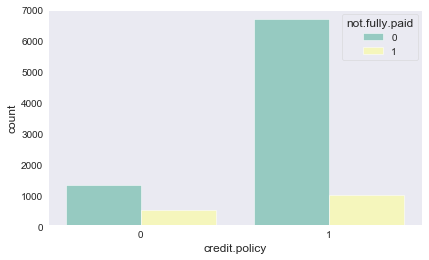

In [223]:
sns.set_style('dark')
sns.countplot(data['credit.policy'],hue = data['not.fully.paid'])


Text(0.5, 0, 'fico')

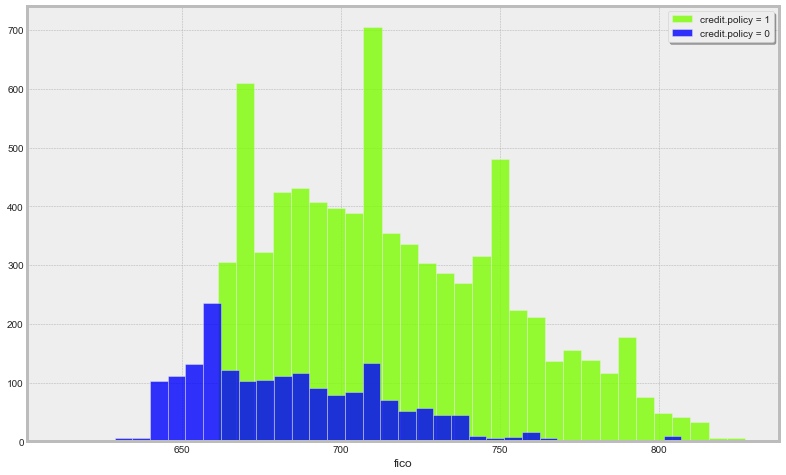

In [224]:
plt.figure(figsize = (12,8))
plt.style.use('bmh')
data[data['credit.policy']==1]['fico'].hist(alpha = 0.8,color = 'lawngreen',bins = 35,label = 'credit.policy = 1')
data[data['credit.policy']==0]['fico'].hist(alpha = 0.8,color = 'blue',bins = 35,label = 'credit.policy = 0')
plt.legend(shadow = 'True')
plt.xlabel('fico')

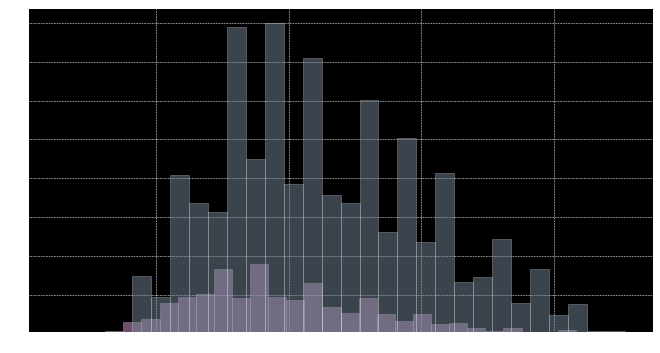

In [225]:
plt.figure(figsize=(10,6))
plt.style.use('dark_background')
data[data['not.fully.paid']==1]['fico'].hist(alpha = 0.5,color = 'plum',bins = 30,label = 'not fully paid = 1')
data[data['not.fully.paid']==0]['fico'].hist(alpha = 0.5,color = 'lightslategray',bins = 30,label = 'not fully paid = 0')

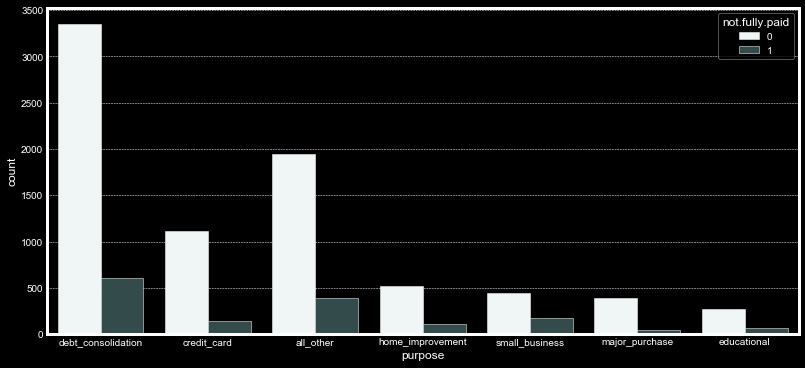

In [226]:
plt.figure(figsize=(12,6))
sns.countplot(x = data['purpose'],hue = data['not.fully.paid'],color = 'darkslategray')

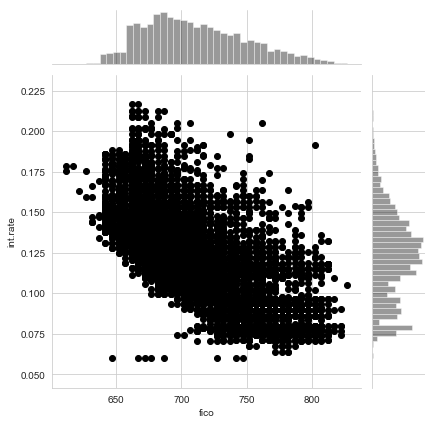

In [12]:
sns.set_style('whitegrid')
sns.jointplot(x = data['fico'],y = data['int.rate'],color = 'black')

# Categorical Features

In [14]:
data['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [15]:
Purpose = pd.get_dummies(data.purpose)

In [16]:
Purpose.head()

,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0


In [17]:
final_data = pd.concat([Purpose,data],axis = 1)
final_data.drop(['purpose'],axis = 1,inplace = True)

In [18]:
final_data.isnull().sum()

all_other             0
credit_card           0
debt_consolidation    0
educational           0
home_improvement      0
major_purchase        0
small_business        0
credit.policy         0
int.rate              0
installment           0
log.annual.inc        0
dti                   0
fico                  0
days.with.cr.line     0
revol.bal             0
revol.util            0
inq.last.6mths        0
delinq.2yrs           0
pub.rec               0
not.fully.paid        0
dtype: int64

# Train Test Split

In [20]:
x = final_data.iloc[:,0:19]
y = final_data['not.fully.paid']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 100)

# Training a Decision Tree Model

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
model = DecisionTreeClassifier()

In [26]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Predictions and Evaluation of Decision Tree

In [29]:
predict = model.predict(x_test)

In [30]:
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [32]:
accuracy_score(predict,y_test)

0.7359081419624217

In [33]:
confusion_matrix(predict,y_test)

array([[2000,  367],
       [ 392,  115]], dtype=int64)

# Training the Random Forest Model

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
model1 = RandomForestClassifier()

In [36]:
model1.fit(x_train,y_train)

C:\Users\PILLA ROSHINI DEVI\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Predictions and Evaluation

In [37]:
pred = model1.predict(x_test)

In [38]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(pred,y_test)

0.8242867084203201